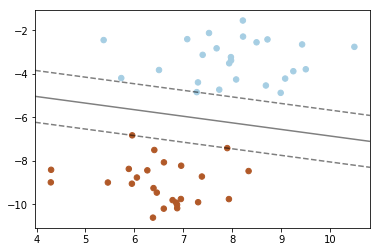

In [6]:
'''
线性内核的支持向量机模型
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


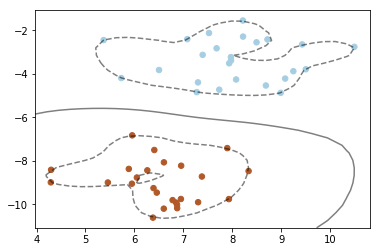

In [7]:
'''
RBF内核的支持向量机模型
'''

X, y = make_blobs(n_samples=50, centers=2, random_state=6)
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


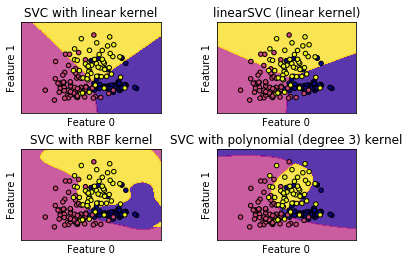

In [18]:
'''
SVM的核函数与参数选择

不同核函数的SVM对比
'''


from sklearn.datasets import load_wine

def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

wine = load_wine()
X = wine.data[:, :2]
y = wine.target

C = 1.0 #SVM正则化参数

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', gamma=3, C=C) )

models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
         'linearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

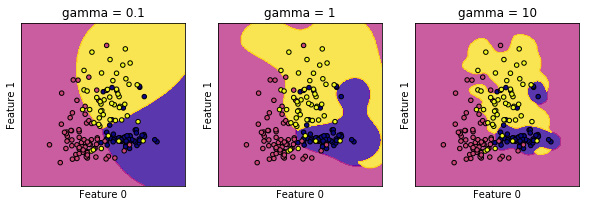

In [24]:
'''
支持向量机的gamma参数调节
'''
C = 1.0

models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C))

models = (clf.fit(X, y) for clf in models)

titles = ('gamma = 0.1',
         'gamma = 1',
         'gamma = 10')

fig, sub = plt.subplots(1, 3, figsize=(10,3))

X0, X1 = X[:, 0], X[:, 1]

xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

linear 核函数的模型训练集得分: 0.709
linear 核函数的模型测试集得分: 0.696
rbf 核函数的模型训练集得分: 0.145
rbf 核函数的模型测试集得分: 0.001


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


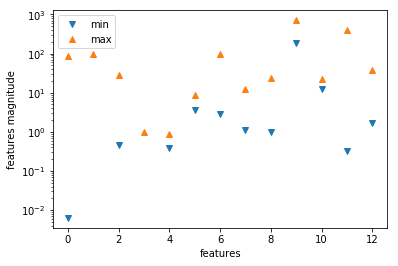

In [30]:
'''
波士顿房价回归分析
'''

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


boston = load_boston()

# print (boston.keys())
# print (boston['DESCR'])

X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
# print(X_train.shape)
# print(X_test.shape)

for kernel in ['linear', 'rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel, '核函数的模型训练集得分: {:.3f}'.format(svr.score(X_train, y_train)))
    print(kernel, '核函数的模型测试集得分: {:.3f}'.format(svr.score(X_test, y_test)))
    
    
plt.plot(X.min(axis=0), 'v', label='min')
plt.plot(X.max(axis=0), '^', label='max')

plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('features magnitude')
plt.show()

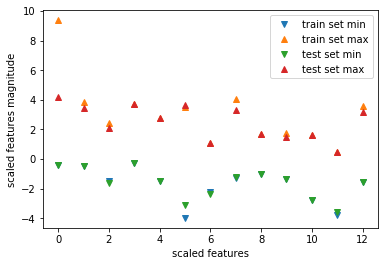

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.plot(X_train_scaled.min(axis=0), 'v', label='train set min')
plt.plot(X_train_scaled.max(axis=0), '^', label='train set max')
plt.plot(X_test_scaled.min(axis=0), 'v', label='test set min')
plt.plot(X_test_scaled.max(axis=0), '^', label='test set max')

plt.legend('log')

plt.legend(loc='best')

plt.xlabel('scaled features')
plt.ylabel('scaled features magnitude')
plt.show()

In [39]:
#用预处理后的数据重新训练模型
for kernel in ['linear', 'rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print(kernel, '核函数的模型训练集得分: {:.3f}'.format(svr.score(X_train_scaled, y_train)))
    print(kernel, '核函数的模型测试集得分: {:.3f}'.format(svr.score(X_test_scaled, y_test)))
    
print('\n')
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
print('调节参数后的模型在训练集得分: {:.3f}'.format(svr.score(X_train_scaled, y_train)))
print('调节参数后的模型在测试集得分: {:.3f}'.format(svr.score(X_test_scaled, y_test)))

linear 核函数的模型训练集得分: 0.706
linear 核函数的模型测试集得分: 0.698
rbf 核函数的模型训练集得分: 0.665
rbf 核函数的模型测试集得分: 0.695


调节参数后的模型在训练集得分: 0.966
调节参数后的模型在测试集得分: 0.894
